# Usage of the "brenda" module for obtaining molecules from the BRENDA database

First create a molecule object that holds all the data. Here we use only molecules that are listed in the **"Natural substrates"** table of BRENDA

In [1]:
import brenda

# other valid values for typeof are 'product', 'substrates', 'products'
mol_obj = brenda.BrendaNaturalMols(typeof='substrate') 

type(mol_obj)

brenda.BrendaNaturalMols

You can equally well use molecules form the **"Substrates"** tabel in BRENDA

In [2]:
mol_obj = brenda.BrendaMols(typeof='substrate') 

type(mol_obj)

brenda.BrendaMols

Get a list of all unique molecules from all EC numbers

In [3]:
molecules = mol_obj.names()

molecules[:10]

['(((4-((4-dimethylamino)phenyl)azo)phenyl)sulfonyl)amino-(gamma-aminobutyric acid)-pqvl-f(no2)-vmh-(5-(2-aminoethylamino)-1-naphthalenesulfonic acid)',
 '(((4-((4-dimethylamino)phenyl)azo)phenyl)sulfonyl)amino-(gamma-aminobutyric acid)-pqvl-pvmh-(5-(2-aminoethylamino)-1-naphthalenesulfonic acid)',
 '((1s,3s)-3-(7-amino-2h-2,3,5,6-tetraazabenzo[cd]azulen-2-yl)cyclobutyl)methyl tetrahydrogen triphosphate',
 '((7-methoxycoumarin-4-yl)acetyl)-ser-glu-val-asn-leu-asp-ala-glu-phe-lys(2,4-dinitrophenyl)',
 '((7-methoxycoumarin-4-yl)acetyl)-ser-glu-val-asn-leu-asp-ala-glu-phe-lys(2,4-dinitrophenyl)-arg-arg-nh2',
 '((7-methoxycoumarin-4-yl)acetyl-pro-leu-gly-leu-n-3-(2,4-dinitro-phenyl)-l-2,3-diaminopropionyl-ala-arg-nh2)',
 '(([(1e)-phenylmethylidene]amino)oxy)acetic acid',
 "((e,e)-4,4'-dihydroxy-5,5'-dimethoxy-3,3'-bicinnamic acid l-arg-p-o-yl ester)",
 '((gp-4-hydroxy-l-proline)5gpk(7-methoxycoumarin-4-yl)acetyl)gpqglrgqk(2,4-dinitrophenyl)gvr((gp-4-hydroxy-l-proline)5-nh2)3',
 '(+-)-11-hy

Get a list of all EC numbers in the dataset

In [4]:
ec_nums = mol_obj.ec()

ec_nums[:10]

['1.1.1.1',
 '1.1.1.10',
 '1.1.1.100',
 '1.1.1.101',
 '1.1.1.102',
 '1.1.1.103',
 '1.1.1.104',
 '1.1.1.105',
 '1.1.1.106',
 '1.1.1.107']

Get a dictionary with EC number keys holding lists of molecule names

In [5]:
mol_data = mol_obj.data_dict()

print(list(mol_data.keys())[:10])

print('\n')

print(mol_data['1.1.3.10'])


['1.1.1.1', '1.1.1.10', '1.1.1.100', '1.1.1.101', '1.1.1.102', '1.1.1.103', '1.1.1.104', '1.1.1.105', '1.1.1.106', '1.1.1.107']


['1,5-anhydro-d-fructose', '1,5-anhydro-d-glucitol', '1,5-anhydro-s-sorbitol', '1,6-anhydro-d-glucose', '1-beta-aurothioglucose', "2,2'-azinobis(3-ethylbenzthiazolinesulfonic acid)", '2,6-dichloroindophenol', '2,6-dimethyl-1,4-benzoquinone', '2-chloro-1,4-benzoquinone', '2-deoxy-2-fluoro-d-glucose', '2-deoxy-d-galactose', '2-deoxy-d-glucose', '2-keto-d-glucose', '2-methoxy-1,4-benzoquinone', '3-deoxy-3-fluoro-beta-d-glucose', '3-deoxy-d-glucose', '3-o-methyl-d-glucose', '5-thioglucose', '6-deoxy-d-glucose', 'allose', 'alpha-d-glucose', 'alpha-d-melibiose', 'arabinose', 'beta-d-galactose', 'cellobiose', 'ferricenium hexafluorophosphate', 'fructose', 'fucono-1,5-lactone', 'fucose', 'galactose', 'gentibiose', 'glucono-1,5-lactone', 'gluconolactone', 'glucose', 'idose', 'lactose', 'maltoheptaose', 'maltopentaose', 'maltose', 'maltotriose', 'mannoheptose', 'manno

Get a data frame holding the EC number and substrate name data

In [6]:
mol_data = mol_obj.data_frame()

mol_data.head()

,ec_number,molecule
0,1.1.1.1,"(1s,3s)-3-methylcyclohexanol"
1,1.1.1.1,(2e)-2-methylpent-2-enal
2,1.1.1.1,"(2e)-3,7-dimethylocta-2,6-dienal"
3,1.1.1.1,(2e)-but-2-en-1-ol
4,1.1.1.1,(2e)-but-2-enal


# Usage of the "cheminfo" module for working with the molecules

First create a molecule object that holds all the data. Conversion from names to SMILES occurs automatically on creation of the object.

The cheminfo module is dependent on the following cheminformatics packages:

cirpy

pubchempy

rdkit

### First let's look at name to SMILE conversion

The SMILES are fetched from saved data where possible, otherwise tries to get them from a server. The retest_none variable can be used to force the script to try to get SMILES for the molecule names that did not work in previous runs.

In [7]:
import cheminfo

mols = ['(S)-Lactate', 'Glycolate', 'Tryptophane', 'ATP', 'ADP', 'AMP']

chem_obj = cheminfo.NameToSmile(names=mols, retest_none=False)

type(chem_obj)

cheminfo.NameToSmile

Get a list of molecule names

In [8]:
molecules = chem_obj.names()

molecules[:10]

['lactate', 'glycolate', 'tryptophane', 'atp', 'adp', 'amp']

Get a list of all the smiles

In [9]:
smiles = chem_obj.smiles()

smiles[:10]

['CC(C(=O)O)O',
 'C(C(=O)O)O',
 'C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)N',
 'C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O',
 'C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(=O)(O)O)O)O',
 'C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)O)O)O']

Get a dictionary of all data with metabolite names as keys and smiles as values

In [10]:
smile_data = chem_obj.data_dict()

print(list(smile_data.keys())[:10])

print('\n')

print(smile_data['lactate'])

['lactate', 'glycolate', 'tryptophane', 'atp', 'adp', 'amp']


CC(C(=O)O)O


Get a data frame with the molecule names and smiles data

In [11]:
smile_data = chem_obj.data_frame()

smile_data.head()

,molecule,smile
0,lactate,CC(C(=O)O)O
1,glycolate,C(C(=O)O)O
2,tryptophane,C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)N
3,atp,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(...
4,adp,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(...


**Note**

Each of the four methods names(), smiles(), data_dict(), and data_frame() take the optional argument "exclude_none". By default this is set to False and all molecule names for which no SMILE could be obtained are excluded. If set to True, these will be included in the output.

### Now let's look at getting interesting data out of the SMILES

First create a data object using molecule names and smiles as input.

In [12]:
data_obj = cheminfo.SmileToData(names=chem_obj.names(),
                                smiles=chem_obj.smiles(), 
                                descriptor='morgan3', 
                                metric='tanimoto')

type(data_obj)

cheminfo.SmileToData

Several different alortithms for calculating descriptors are available. A list of the available ones can easily be obtained.

In [13]:
data_obj.valid_descriptors()

['maccs', 'morgan3', 'morgan5', 'rdkit']

Additionally several different metrics for comparing the molecules are available. A list of the available ones can easily be obtained.

In [14]:
data_obj.valid_metrics()

['asymmetric',
 'braunblanquet',
 'cosine',
 'dice',
 'kulczynski',
 'mcconnaughey',
 'rogotgoldberg',
 'russel',
 'sokal',
 'tanimoto']

#### Obtaining basic properties for the molecules

Get a list of the molecule names 

In [15]:
names = data_obj.names()

names[:10]

['lactate', 'glycolate', 'tryptophane', 'atp', 'adp', 'amp']

Get a list of the molecule smiles

In [16]:
smiles = data_obj.smiles()

smiles[:10]

['CC(C(=O)O)O',
 'C(C(=O)O)O',
 'C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)N',
 'C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O',
 'C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(=O)(O)O)O)O',
 'C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)O)O)O']

Get a list of the molecule objects obtained from the smiles

[<rdkit.Chem.rdchem.Mol object at 0x7ff912035170>, <rdkit.Chem.rdchem.Mol object at 0x7ff9120351c0>, <rdkit.Chem.rdchem.Mol object at 0x7ff912035210>, <rdkit.Chem.rdchem.Mol object at 0x7ff912035260>, <rdkit.Chem.rdchem.Mol object at 0x7ff9120352b0>, <rdkit.Chem.rdchem.Mol object at 0x7ff912035300>]


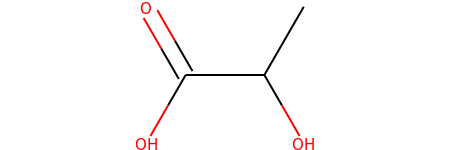

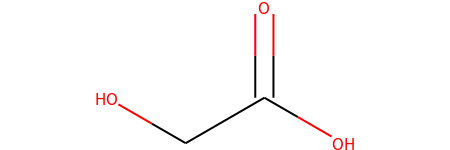

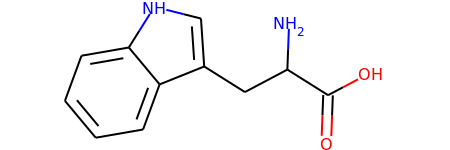

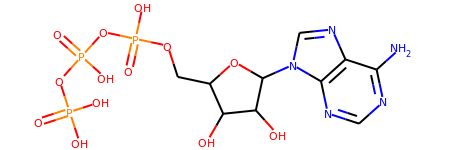

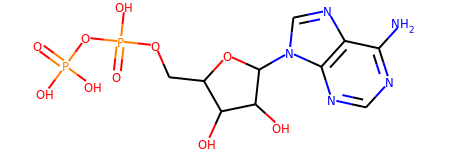

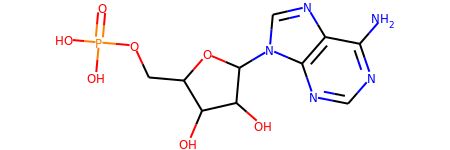

In [17]:
mols = data_obj.molecules()

print(mols[:10])

for m in mols[:10]:
    display(m)

Get a list of fingerprint objects for each of the molecules

In [18]:
fingerp = data_obj.fingerprints()

fingerp[0]

It is also possible to get the fingerprints as bitstrings

In [19]:
fingerp = data_obj.fingerprints_str()

fingerp[0]

'010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Or as a bit list if one prefers...

In [20]:
fingerp = data_obj.fingerprints_list()

fingerp[0]

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Get a list of molecule properties for the molecules, in this case molecular weight.

In [21]:
props = data_obj.property(property_type='molwt')

props[:10]

[90.031694052,
 76.016043988,
 204.089877624,
 506.9957454619997,
 427.0294149399998,
 347.06308441799985]

You can easiliy obtain a list of which properties that are available

In [22]:
data_obj.valid_properties()

['molwt',
 'num_alirings',
 'num_arorings',
 'num_hbond_acceptors',
 'num_hbond_donors',
 'num_hetatom',
 'num_nhoh',
 'num_no',
 'num_rotbond',
 'tpsa']

These are a bit cryptic, so one can also get the explanation.

In [23]:
data_obj.explain_properties()

['"molwt": molecular weight',
 '"num_alirings": number of aliphatic rings',
 '"num_arorings": number of aromatic rings',
 '"num_hbond_acceptors": number of hydrogen bond acceptors',
 '"num_hbond_donors": number of hydrogen bond donors',
 '"num_hetatom": number of hetero atoms',
 '"num_nhoh": number of NH and OH groups',
 '"num_no": number of N and O atoms',
 '"num_rotbond": number of rotatable bonds',
 '"tpsa": polar surface area']

Get a dictionary containing a selection of chemical properties for each molecule

In [24]:
prop_dict = data_obj.data_dict()

print(prop_dict.keys())

prop_dict['lactate']

dict_keys(['lactate', 'glycolate', 'tryptophane', 'atp', 'adp', 'amp'])


{'smile': 'CC(C(=O)O)O',
 'molwt': 90.031694052,
 'num_alirings': 0,
 'num_arorings': 0,
 'num_hbond_acceptors': 2,
 'num_hbond_donors': 2,
 'num_hetatom': 3,
 'num_nhoh': 2,
 'num_no': 3,
 'num_rotbond': 1,
 'tpsa': 57.53}

Get a data frame containing a selection of chemical properties for each molecule

In [25]:
prop_data = data_obj.data_frame()

prop_data.head()

,molecule,smile,molwt,num_alirings,num_arorings,num_hbond_acceptors,num_hbond_donors,num_hetatom,num_nhoh,num_no,num_rotbond,tpsa
0,lactate,CC(C(=O)O)O,90.031694,0,0,2,2,3,2,3,1,57.53
1,glycolate,C(C(=O)O)O,76.016044,0,0,2,2,3,2,3,1,57.53
2,tryptophane,C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)N,204.089878,0,2,2,3,4,4,4,3,79.11
3,atp,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(...,506.995745,1,2,14,7,21,8,18,8,279.13
4,adp,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(...,427.029415,1,2,12,6,17,7,15,6,232.60


Get a matrix of all pairwise similarities between molecules

In [26]:
data_obj.similarity()

,lactate,glycolate,tryptophane,atp,adp,amp
lactate,1.000000,0.250000,0.125000,0.037500,0.038961,0.042857
glycolate,0.250000,1.000000,0.106383,0.038462,0.040000,0.044118
tryptophane,0.125000,0.106383,1.000000,0.074766,0.076923,0.082474
atp,0.037500,0.038462,0.074766,1.000000,0.905405,0.786667
adp,0.038961,0.040000,0.076923,0.905405,1.000000,0.819444
amp,0.042857,0.044118,0.082474,0.786667,0.819444,1.000000


Get a matrix of all pairwise distances between molecules

In [27]:
data_obj.distance()

,lactate,glycolate,tryptophane,atp,adp,amp
lactate,0.000000,0.750000,0.875000,0.962500,0.961039,0.957143
glycolate,0.750000,0.000000,0.893617,0.961538,0.960000,0.955882
tryptophane,0.875000,0.893617,0.000000,0.925234,0.923077,0.917526
atp,0.962500,0.961538,0.925234,0.000000,0.094595,0.213333
adp,0.961039,0.960000,0.923077,0.094595,0.000000,0.180556
amp,0.957143,0.955882,0.917526,0.213333,0.180556,0.000000


Get similarity statistics (minimum similarity, maximum similarity, etc.) for each molecule in the whole set. The diagonal (self-similarity) is ignored in these calculations. Molecules with a low max and a low sum might be considered outliers.

In [28]:
sim_data = data_obj.molecule_similarity_stats()

sim_data


,min,max,sum,median,mean,stdev
lactate,0.037500,0.250000,0.494318,0.042857,0.098864,0.092217
glycolate,0.038462,0.250000,0.478962,0.044118,0.095792,0.090777
tryptophane,0.074766,0.125000,0.465547,0.082474,0.093109,0.021822
atp,0.037500,0.905405,1.842800,0.074766,0.368560,0.438149
adp,0.038961,0.905405,1.880734,0.076923,0.376147,0.445211
amp,0.042857,0.819444,1.775560,0.082474,0.355112,0.409389


Get similarity statistics for the entire set of molecules.

In [29]:
sim_data = data_obj.global_similarity_stats()

sim_data

{'min': 0.0375,
 'max': 0.9054054054054054,
 'sum': 3.468960521445852,
 'median': 0.07692307692307693,
 'mean': 0.2312640347630568,
 'stdev': 0.3190818179151157}

Get a subset of diverse molecules, chosen from the total set of molecules. It is possible to specify already selected molecules in the "firstpicks" argument.

In [30]:
data_obj.diversity_pick(n=3, firstpicks=['glycolate'])

['glycolate', 'atp', 'tryptophane']

Draw the molecules

Draw the molecules and highlight the common substructure

Cluster the molecules and obtain a vector indicating cluster identity for each molecule. In this case Butina clustering is used on already pre-computed distances.

In [31]:
data_obj.cluster_butina()

[3, 2, 1, 0, 0, 0]

Other cluster methods...

In [32]:
# here

### Plotting


Use PCA to visualize the relationship between all molecules __based on molecule fingerprints__. 

Optional arguments include:

include_labels: True or False

color_categories: None or a list of numbers the same length as the data indicating which point belong to what group.

No color but with labels

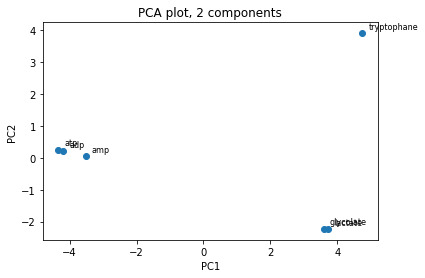

In [33]:
data_obj.pca(include_labels=True)

No labels, but with coloring

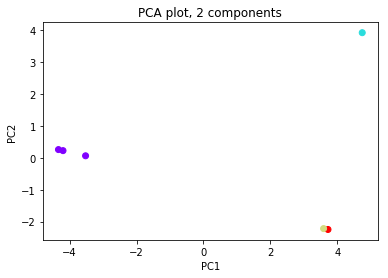

In [34]:
data_obj.pca(color_categories=[3, 2, 1, 0, 0, 0])

Use MDS to visualize the relationship between all molecules __based on pre-computed distances__. The options are same as for PCA. First with labels.

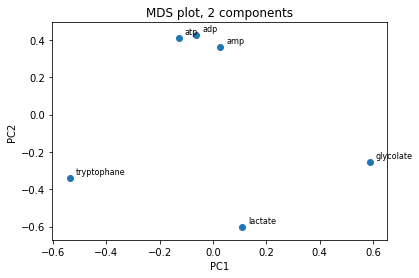

In [35]:
data_obj.mds(include_labels=True)

Now with colors instead of labels.

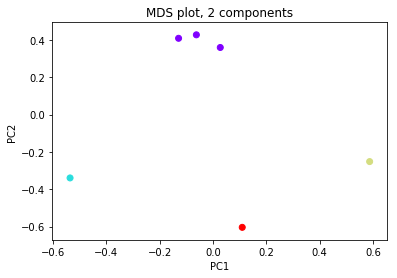

In [36]:
data_obj.mds(color_categories=[3, 2, 1, 0, 0, 0])

Use t-SNE to visualize the relationship between all molecules __based on molecule fingerprints__. The options are same as for PCA. First with labels.

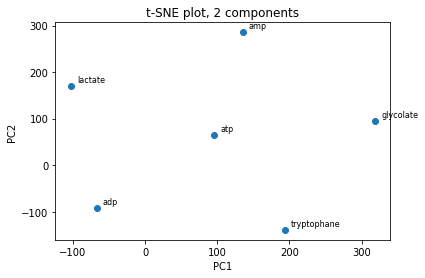

In [37]:
data_obj.tsne(include_labels=True)

Now with colors instead of labels.

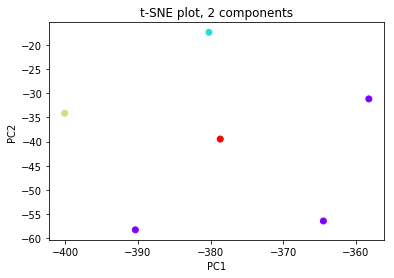

In [38]:
data_obj.tsne(color_categories=[3, 2, 1, 0, 0, 0])

## Example usage

So let's say I'm interested in looking at EC 1.1.3.15. I might do something along these lines:

In [39]:
# first get all the substrates
mol_obj = brenda.BrendaMols(typeof='substrate') 
my_ec_data = mol_obj.data_dict()['1.1.3.15']

my_ec_data

['2 -hydroxyisocaproate',
 '2-hydroxy octanoate',
 '2-hydroxy palmitate',
 '2-hydroxy-3-butynoate',
 '2-hydroxy-3-heptynoate',
 '2-hydroxy-3-hexynoate',
 '2-hydroxy-3-methylvalerate',
 '2-hydroxy-3-octynoate',
 '2-hydroxy-3-pentynoate',
 '2-hydroxy-4-methylmercaptobutyrate',
 '2-hydroxy-4-methylthiobutanoic acid',
 '2-hydroxy-beta-methylvalerate',
 '2-hydroxybutanoate',
 '2-hydroxybutyrate',
 '2-hydroxycaproate',
 '2-hydroxycaprylate',
 '2-hydroxydecanoate',
 '2-hydroxydodecanoate',
 '2-hydroxyisocaproate',
 '2-hydroxyisovalerate',
 '2-hydroxyoctanoate',
 '2-hydroxypalmitate',
 '2-hydroxyphenyllactate',
 '2-hydroxyvalerate',
 '3-chlorolactate',
 '3-indolelactate',
 '3-methoxy-4-hydroxymandelate',
 '4-chloromandelate',
 '4-fluoromandelate',
 '4-methoxymandelate',
 '4-methylmandelate',
 '4-nitromandelate',
 '4-trifluoromethylmandelate',
 'alanine',
 'an (s)-2-hydroxy carboxylate',
 'beta-phenyllactate',
 'glycerate',
 'glycolate',
 'glyoxalate',
 'glyoxylate',
 'glyoxylate thiohemiacetal

In [40]:
# need to get smiles for these substrates
chem_obj = cheminfo.NameToSmile(names=my_ec_data)

# as you can see any "strange" substrates that did not give smiles have been excluded
chem_obj.data_dict()

{'2 -hydroxyisocaproate': 'CC(C)CC(O)C([O-])=O',
 '2-hydroxy-3-butynoate': 'CCOC(=O)C(C#C)O',
 '2-hydroxy-3-heptynoate': 'CCCC#CC(O)C([O-])=O',
 '2-hydroxy-3-hexynoate': 'CCC#CC(O)C([O-])=O',
 '2-hydroxy-3-methylvalerate': 'CCC(C)C(C(=O)O)O',
 '2-hydroxy-3-octynoate': 'CCCCC#CC(O)C([O-])=O',
 '2-hydroxy-3-pentynoate': 'CC#CC(O)C([O-])=O',
 '2-hydroxy-4-methylmercaptobutyrate': 'CSCCC(O)C([O-])=O',
 '2-hydroxy-4-methylthiobutanoic acid': 'CSCCC(C(=O)O)O',
 '2-hydroxy-beta-methylvalerate': 'CCC(C)C(O)C([O-])=O',
 '2-hydroxybutanoate': 'CCC(C(=O)[O-])O',
 '2-hydroxybutyrate': 'CCC(C(=O)O)O',
 '2-hydroxycaproate': 'CCCCC(C(=O)O)O',
 '2-hydroxycaprylate': 'CCCCCCC(C(=O)O)O',
 '2-hydroxydecanoate': 'CCCCCCCCC(C(=O)O)O',
 '2-hydroxydodecanoate': 'CCCCCCCCCCC(C(=O)[O-])O',
 '2-hydroxyisocaproate': 'CC(C)CC(C(=O)O)O',
 '2-hydroxyisovalerate': 'CC(C)C(C(=O)O)O',
 '2-hydroxyoctanoate': 'CCCCCCC(C(=O)O)O',
 '2-hydroxypalmitate': 'CCCCCCCCCCCCCCC(C(=O)[O-])O',
 '2-hydroxyphenyllactate': 'CC(O)(C([O

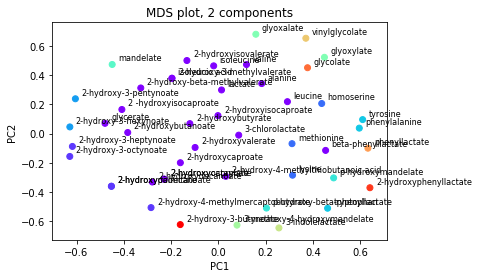

In [41]:
# now I make the data object to do the fun stuff
data_obj = cheminfo.SmileToData(names=chem_obj.names(),
                                smiles=chem_obj.smiles(), 
                                descriptor='morgan3', 
                                metric='tanimoto')

# cluster them
clu = data_obj.cluster_butina()

# use to cluster categories to color points in an MDS plot
data_obj.mds(include_labels=True, color_categories=clu)

In [42]:
# that's a lot of different types of molecules in there, I wonder how similar they are on average
data_obj.global_similarity_stats()

{'min': 0.061224489795918366,
 'max': 1.0,
 'sum': 236.9613845008384,
 'median': 0.19047619047619047,
 'mean': 0.21920572109235745,
 'stdev': 0.12151247459320104}

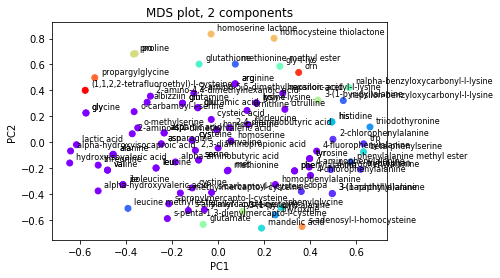

In [43]:
# I happen to know that EC 1.4.3.2 is also active on a range of substrates. 
# I wonder if that EC class takes substrates that are on average more or less similar

my_ec_data = mol_obj.data_dict()['1.4.3.2']
chem_obj = cheminfo.NameToSmile(names=my_ec_data)
data_obj = cheminfo.SmileToData(names=chem_obj.names(),
                                smiles=chem_obj.smiles(), 
                                descriptor='morgan3', 
                                metric='tanimoto')

# cluster them
clu = data_obj.cluster_butina()

# use to cluster categories to color points in an MDS plot
data_obj.mds(include_labels=True, color_categories=clu)

In [44]:
# seems like the mean similarity is a bit higher here, but on the whole I would say they are comparable
data_obj.global_similarity_stats()

{'min': 0.021739130434782608,
 'max': 1.0,
 'sum': 1216.469725025713,
 'median': 0.2391304347826087,
 'mean': 0.255937244903369,
 'stdev': 0.12118952725373278}

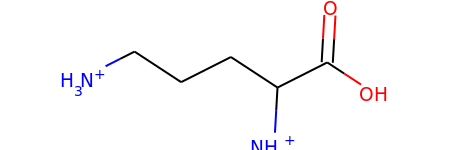

In [45]:
# what is orn? Don't know what that is really..

data_obj.molecules('orn')

# Aha, looks like ornithine! Who would have guessed...